In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

# EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean 13.20 and standard deviation 2.50. A company in this industry employs 40 workers, paying them an average of 12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)
CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826




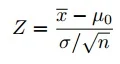

In [6]:
Ho: mu = 13.20
Ha: mu < 13.20

mu = 13.20
sigma = 2.50
alpha = 0.01
n = 40
xbar = 12.20


z = (xbar - mu) / (2.50/np.sqrt(40))
z

-2.5298221281347035

when z = - 2.5298221281347035 corresponding p value = 0.005706 which is smaller than alpha value. we can reject Ho..
which also means that, the company paying substandart wages..


In [24]:
?? idk how to do it with python

Object ` idk how to do it with python` not found.


# EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06


In [103]:
df = pd.read_csv("soil - Sheet1.csv")
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [104]:
df.shape

(35, 2)

In [105]:
df.shape[0]-1

34

Ho : mu1 = mu2
Ha : mu1 != mu2

In [106]:
mu1 = df.Soil1.mean()
mu2 = df.Soil2.mean()
mu1, mu2

(1.6918, 1.4171142857142855)

In [107]:
#Perform Levene test for equal variances
#Ho: the population variances are eqaul
#Ha : there is a diffrence in variances
leveneTest= stats.levene(df.dropna()['Soil1'], df.Soil2)
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [49]:
# since pvalue is bigger than 0.05 fail to reject Ho

In [110]:
indTest = stats.ttest_ind(df.dropna()["Soil1"], df.Soil2, equal_var=True)
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [111]:
indTest.pvalue

2.59322873235282e-06

since p value much less than 0.01 we rejcet Ho.Soils appear to differ.

# EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [114]:
df1 = pd.read_csv("2015 PISA Test - Sheet1.csv")
df1.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [139]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


In [117]:
df1.groupby("Continent_Code")["Math"].mean()

Continent_Code
AF    363.212100
AS    466.216647
EU    477.981449
OC    494.559750
SA    402.887700
Name: Math, dtype: float64

In [140]:
df1.groupby("Continent_Code")["Math"].std()

Continent_Code
AF     5.099513
AS    64.356490
EU    35.150403
OC     0.938401
SA    18.128894
Name: Math, dtype: float64

In [142]:
df1.groupby("Continent_Code")["Math"].var()

Continent_Code
AF      26.005030
AS    4141.757822
EU    1235.550805
OC       0.880597
SA     328.656783
Name: Math, dtype: float64

Ho : mean1 = mean2
Ho : mean1 "= mean2

In [136]:
mean1 = df1.loc[df1["Continent_Code"]=="EU"]["Math"]
mean2 = df1.loc[df1["Continent_Code"]=="AS"]["Math"]

In [137]:
indTest = stats.ttest_ind(mean1, mean2, equal_var=True)
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

Since our p value = 0.38826888111307345 is bigger than 0.05, we can say that fail to reject Ho.

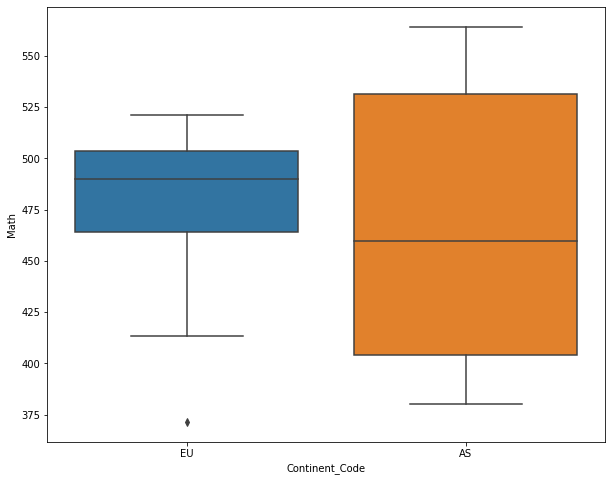

In [164]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Continent_Code", y="Math", data= df1[(df1['Continent_Code'] == "AS") | (df1['Continent_Code'] == "EU")][['Math','Continent_Code']]);

# EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.


CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128

